In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
data = pd.read_csv("../../Data/Churn_Modelling.csv")

In [3]:
data.shape

(10000, 14)

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### EDA

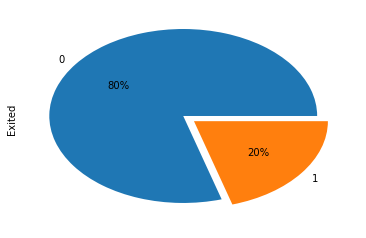

In [9]:
data.Exited.value_counts().plot(kind='pie', autopct='%1.0f%%',explode=(0.05, 0.05))

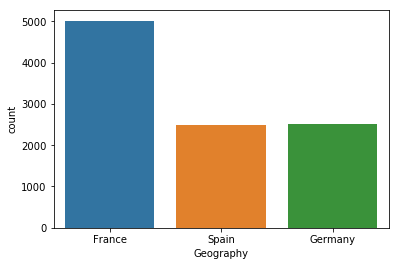

In [10]:
sns.countplot(x='Geography', data=data)

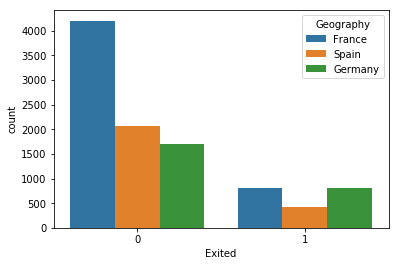

In [11]:
sns.countplot(x='Exited',hue='Geography', data=data)

### Pre-processing

In [12]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
output = ['Exited']

In [14]:
for cat in categorical_columns:
    data[cat] = data[cat].astype('category')

In [15]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited                int64
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Normalise

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in [numerical_columns,categorical_columns, output]:
    data[col] = scaler.fit_transform(data[col])

In [19]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


In [20]:
x = data.loc[:, :"EstimatedSalary"]
y = data['Exited']

In [21]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [22]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

In [23]:
print(x.shape, y.shape)

(10000, 10) (10000,)


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [25]:
print("x_train dim:",x_train.shape, "\ty_train dim:", y_train.shape)
print("x_test dim:",x_test.shape, "\ty_test dim:", y_test.shape)

x_train dim: (7000, 10) 	y_train dim: (7000,)
x_test dim: (3000, 10) 	y_test dim: (3000,)


### Convert to tensor

In [26]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [27]:
print("x_train dim:",x_train_tensor.shape, "\ty_train dim:", y_train_tensor.shape)
print("x_test dim:",x_test_tensor.shape, "\ty_test dim:", y_test_tensor.shape)

x_train dim: torch.Size([7000, 10]) 	y_train dim: torch.Size([7000])
x_test dim: torch.Size([3000, 10]) 	y_test dim: torch.Size([3000])


### Model

In [28]:
class Network(nn.Module):
    def __init__(self, n_input, h, n_output):
        super().__init__()
        self.layer = nn.Linear(n_input, h)
        self.output = nn.Linear(h, n_output)
    def forward(self, x):
        x = self.layer(x)
        x = self.output(x)
        x = torch.sigmoid(x)
        return x

In [29]:
n_input, n_output = x_train_tensor.shape[1], 2
h = 100

In [30]:
model = Network(n_input, h, n_output)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [32]:
losses = []
epochs = 500
for e in range(1, epochs+1):
    
    y_pred = model(x_train_tensor)
    
    loss = criterion(y_pred, y_train_tensor)
    losses.append(loss)
    if e%50 ==0:
        print(f"epochs: {e} ===> loss:{loss}")
        
        
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs: 50 ===> loss:0.5196766257286072
epochs: 100 ===> loss:0.5196714997291565
epochs: 150 ===> loss:0.5196654200553894
epochs: 200 ===> loss:0.5196506977081299
epochs: 250 ===> loss:0.5195953845977783
epochs: 300 ===> loss:0.5104842782020569
epochs: 350 ===> loss:0.48142826557159424
epochs: 400 ===> loss:0.4782584607601166
epochs: 450 ===> loss:0.47773289680480957
epochs: 500 ===> loss:0.47752806544303894


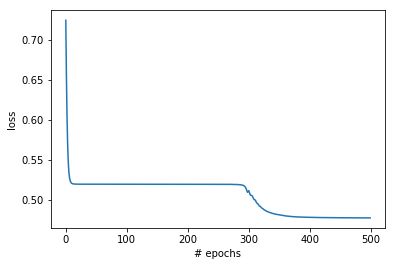

In [41]:
plt.plot(range(len(losses)), losses)
plt.xlabel("# epochs")
plt.ylabel("loss")
plt.show()

In [42]:
with torch.no_grad():
    y_val = model(x_test_tensor)
    loss = criterion(y_val, y_test_tensor)
print("Test loss: ", loss)    

Test loss:  tensor(0.4688)


In [44]:
y_val = np.argmax(y_val, axis=1)

In [45]:
y_val

tensor([0, 0, 1,  ..., 0, 0, 0])

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test_tensor, y_val))

print(classification_report(y_test_tensor, y_val))

accuracy = accuracy_score(y_test_tensor, y_val)*100
print(f'Accuracy: {accuracy:.2f}')

[[2354   54]
 [ 414  178]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2408
           1       0.77      0.30      0.43       592

    accuracy                           0.84      3000
   macro avg       0.81      0.64      0.67      3000
weighted avg       0.83      0.84      0.82      3000

Accuracy: 84.40
